# Notebook Instructions

1. All the <u>code and data files</u> used in this course are available in the downloadable unit of the <u>last section of this course</u>.
2. You can run the notebook document sequentially (one cell at a time) by pressing **Shift + Enter**. 
3. While a cell is running, a [*] is shown on the left. After the cell is run, the output will appear on the next line.

This course is based on specific versions of Python packages. You can find the details of the packages in <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank" >this manual</a>.

# Relative Strength Index

In the previous unit, you had learnt about the relative strength index (RSI). In this notebook, you will learn to calculate the RSI value using the TA-Lib library. And generates buy and sell signals based on the RSI values.

In this notebook, you will perform the following steps:

1. [Read Price Data](#read)
2. [Calculate RSI](#RSI)
3. [Trading Signals](#signals)
4. [Visualise Trading Signals](#visualise)

# Import Libraries

In [1]:
# Data analysis and manipulation
import pandas as pd
import numpy as np

# Technical indicators
import talib as ta

# Import matplotlib as an alias plt and set the style
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

<a id='read'></a> 
## Read Price Data

The OHLCV data of Gold ETF is stored in a csv file. This is the daily data starting from 2012. You can download this data from the last unit of this course '**Python Codes and Data**'.

To read a csv file, you can use the `read_csv` method of pandas. The syntax is shown below:

Syntax: 
```python
import pandas as pd
pd.read_csv(filename, index_col)
```
Parameters:

    filename: Name and path of the file in the string format
    index_col: Column(s) to use as the row labels of the dataframe, either given as a string name or column index

In [2]:
# The data is stored in the directory 'data_modules'
path = '../data_modules/'

# Read the daily data of Gold ETF
gld_price = pd.read_csv(path + 'gld_price_2012.csv', index_col=0)

# Set the index to datetime format
gld_price.index = pd.to_datetime(gld_price.index)
gld_price.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,154.759995,156.300003,154.550003,155.919998,155.919998,13385800
2012-01-04,155.429993,157.380005,155.339996,156.710007,156.710007,11549700
2012-01-05,155.369995,158.029999,155.250000,157.779999,157.779999,11621600
2012-01-06,158.589996,158.630005,156.380005,157.199997,157.199997,9790500
2012-01-09,157.360001,157.589996,156.190002,156.500000,156.500000,8771900


<a id='RSI'></a> 
## Calculate RSI

You will use `RSI` function from TA-Lib to calculate the relative strength index. 

Syntax: 
```python
import talib as ta
ta.RSI(Close, period)
```
Parameters:

    Close: Close price of the security
    period: Period of RSI calculation
    
Returns: RSI values for the price of the security.

In [3]:
# Define the RSI period
period = 14

# Calculate the RSI
gld_price['RSI'] = ta.RSI(gld_price['Close'], period)

<a id='signals'></a> 
## Generate Trading Signals

You will use the RSI indicator to generate buy and sell signals.

Buy signal: 

When the RSI value crosses below the threshold of 30, we will initiate a long position. We are using the threshold of 30 as a mark for oversold condition.

$$\text{Buy if: RSI value < 30}$$


Sell signal: 

When the RSI value crosses above the threshold of 70, we will open a new short position. That is, we will exit the long position and initiate the short signal. Here, we are using the threshold of 70 as an overbought condition. 

$$\text{Sell if: RSI value > 70}$$

In [4]:
# Column to store trading signals
gld_price['signal'] = 0

# Buy signals: Use 1 for buy
gld_price.loc[gld_price['RSI'] < 30, 'signal'] = 1

# Sell signals: Use -1 for sell
gld_price.loc[gld_price['RSI'] > 70, 'signal'] = -1

<a id='visualise'></a> 
## Visualise Trading Signals

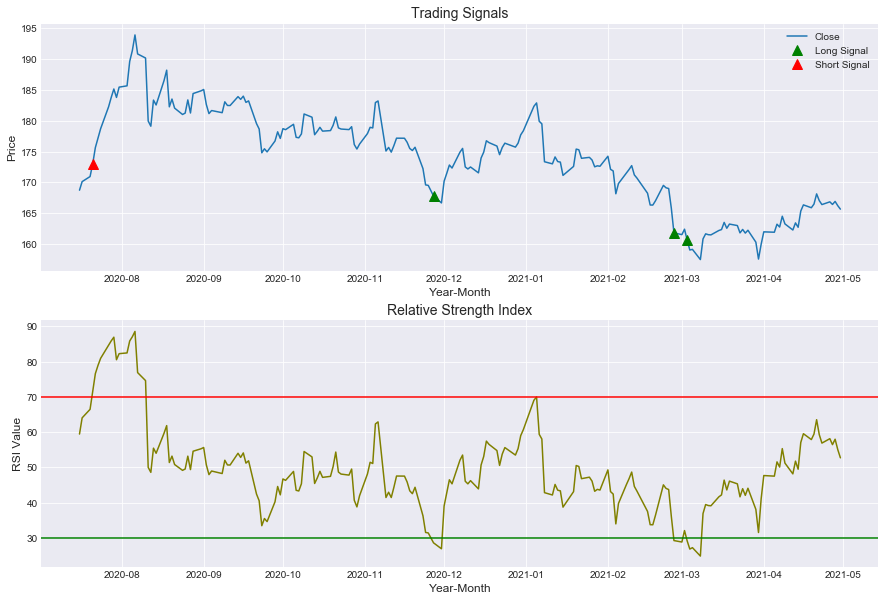

In [5]:
# Show the last 200 points for illustration purposes
data_for_plot = gld_price[-200:]

# Define the plot figure
fig = plt.figure(figsize=(15, 10))

# Sub plot for the close price and trading signals
ax1 = fig.add_subplot(211)

# Set the title and axis labels
ax1.set_title('Trading Signals', fontsize=14)
ax1.set_xlabel('Year-Month', fontsize=12)
ax1.set_ylabel('Price', fontsize=12)

# Plot the close price
ax1.plot(data_for_plot['Close'])

ax1.plot(data_for_plot[(data_for_plot['signal'] == 1) &
                       ((data_for_plot['signal'].shift(1) == 0))]['Close'], r'^', ms=10,
         label="Long Signal", color='green')

ax1.plot(data_for_plot[(data_for_plot['signal'] == -1) &
                       ((data_for_plot['signal'].shift(1) == 0))]['Close'], r'^', ms=10,
         label="Short Signal", color='red')

ax1.legend()

# Sub plot for the RSI
ax2 = fig.add_subplot(212)
ax2.set_title(('Relative Strength Index'), fontsize=14)
ax2.set_xlabel('Year-Month', fontsize=12)
ax2.set_ylabel('RSI Value', fontsize=12)
ax2.plot(data_for_plot['RSI'], color='olive')
ax2.axhline(70, color='red')
ax2.axhline(30, color='green')

plt.show()

In the graph above, when the RSI value is greater than 70, it indicates a sell signal. When the RSI value is less than 30, it shows a buy signal. <br><br>